# Pressure Vessel

In [2]:
import os
import datetime
print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

import time
import glob
import tables as tb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
import numpy.testing as npt
from operator import itemgetter, attrgetter
%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

2017-12-11 22:50:33


In [3]:
from math import sqrt, pi
from pynext.system_of_units import *
from pynext.Material import PhysicalMaterial
from pynext.Material import RadioactiveMaterial
from pynext.Material import PVMaterial

## Physical Material

### Xenon densities (rho_pt, where p is pressure in atm and t is temperature in celsius)

In [4]:
rho_2020 = 124.3 * kg/m3
rho_3020 = 203.35 * kg/m3
rho_1520 = 89.9 * kg/m3
rho_1020 = 58 * kg/m3
rho_0520 = 30 * kg/m3
rho_0720 = 40 * kg/m3
rho_0920 = 50 * kg/m3
rho_list = [
('rho_2020' , rho_2020),
('rho_3020' , rho_3020),
('rho_1520' , rho_1520),
('rho_1020' , rho_1020),
('rho_0520' , rho_0520),
('rho_0720' , rho_0720),
('rho_0920' , rho_0920)
]

In [5]:
def print_latt(densities):
    
    ug = g/cm3
    ukg = kg/m3
    ordered = sorted([ (name, r) for (name, r) in densities ],
                     key=itemgetter(1))
    
    for name, rho in ordered:
        xe = PhysicalMaterial(name='GXe', rho=rho, mu_over_rho=0.039 * cm2/g)
        print("""for xenon gas at density rho ={:7.2f} Latt (2.5 MeV) = {:7.2f} m.""".format(
                 rho / (g/cm3), xe.Latt /m))



In [6]:
def transmittance_and_absorption_at_qbb(densities):
    
    ug = g/cm3
    ukg = kg/m3
    ordered = sorted([ (name, r) for (name, r) in densities ],
                     key=itemgetter(1))
    
    for name, rho in ordered:
        xe = PhysicalMaterial(name='GXe', rho=rho, mu_over_rho=0.039 * cm2/g)
       
        for L in (1*m, 2*m, 3*m):
            print("""for xenon gas at density rho {:7.2f} g/cm3
                 for detector vessel of length {:7.2f} m
                 Latt (2.5 MeV) = {:7.2f} m
                 Fraction of gammas (2.5 MeV) not interacting = {:7.2f}
                 Fraction of gammas (2.5 MeV) not interacting = {:7.2f}
                 """.format(rho/(g/cm3), L /m, xe.Latt/m,
                           xe.transmittance_at_qbb(L), xe.absorption_at_qbb(L) ))



### Fraction of interacting gammas as a function of L for different densities

In [7]:
L = np.arange(1, 3.5, 0.1) * m
xe = PhysicalMaterial(name='GXe', rho=rho_0520, mu_over_rho=0.039 * cm2/g)
I0520 = np.array([xe.absorption_at_qbb(l) for l in L]) 
xe = PhysicalMaterial(name='GXe', rho=rho_1020, mu_over_rho=0.039 * cm2/g)
I1020 = np.array([xe.absorption_at_qbb(l) for l in L]) 
xe = PhysicalMaterial(name='GXe', rho=rho_2020, mu_over_rho=0.039 * cm2/g)
I2020 = np.array([xe.absorption_at_qbb(l) for l in L]) 

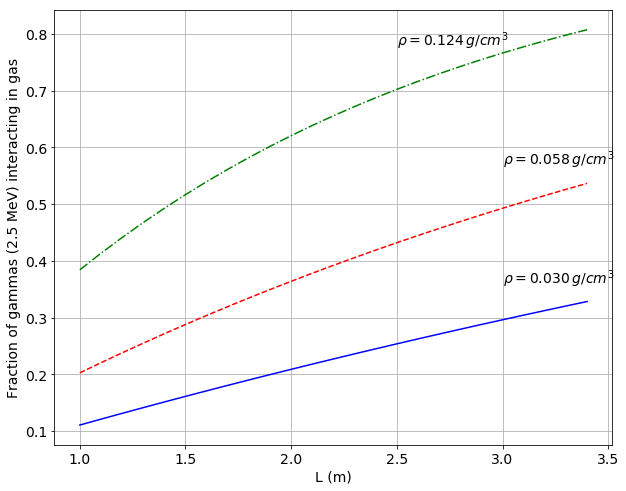

In [11]:
plt.plot(L / m, I0520,'b')
plt.plot(L / m, I1020,'r--')
plt.plot(L / m, I2020,'g-.')
plt.grid(True)
plt.xlabel('L (m)')
plt.ylabel('Fraction of gammas (2.5 MeV) interacting in gas')
plt.text(2.5, 0.78, r'$\rho={0:5.3f} \, g/cm^3$'.format(rho_2020/ (g/cm3)))
plt.text(3, 0.57, r'$\rho={0:5.3f} \, g/cm^3$'.format(rho_1020/ (g/cm3)))
plt.text(3, 0.36, r'$\rho={0:5.3f} \, g/cm^3$'.format(rho_0520/ (g/cm3)))
plt.show()

## Radioactive Materials

### Steel alloy 316Ti

In [230]:
A_BI214_316Ti =    1 * mBq/kg
A_TL208_316Ti = 0.15 * mBq/kg

In [231]:
ti316 = RadioactiveMaterial(name='316ti', rho=7.87 * g/cm3, mu_over_rho=0.039 * cm2/g, 
                            a_bi214=A_BI214_316Ti, a_tl208=A_TL208_316Ti)
ti316


        material                                   = 316ti
        density (rho)                              =    7.87 g/cm3
        mass attenuation coefficient (mu_over_rho) =    0.04 cm2/g
        attenuation coefficient (mu)               =    0.31 cm^-1
        attenuation length (Latt)                  =    3.26 cm
    
        activity Bi-214                = 1.00e-03 Bq /kg
        activity Tl-208                = 1.50e-04 Bq /kg
    

### Copper

In [232]:
A_BI214_CU_LIM =    12  * muBq/kg
A_TL208_CU_LIM =    1.4 * muBq/kg

In [233]:
cu =   RadioactiveMaterial(name='Cu',
                           rho = 8.96 * g/cm3,
                           mu_over_rho = 0.039 * cm2/g,
                           a_bi214 = A_BI214_CU_LIM,
                           a_tl208 = A_TL208_CU_LIM )
cu


        material                                   = Cu
        density (rho)                              =    8.96 g/cm3
        mass attenuation coefficient (mu_over_rho) =    0.04 cm2/g
        attenuation coefficient (mu)               =    0.35 cm^-1
        attenuation length (Latt)                  =    2.86 cm
    
        activity Bi-214                = 1.20e-05 Bq /kg
        activity Tl-208                = 1.40e-06 Bq /kg
    

In [235]:
A_BI214_PB = 370 * muBq/kg
A_TL208_PB = 73 * muBq/kg

In [236]:
pb =   RadioactiveMaterial(name='Pb',
                           rho = 11.33 * g/cm3,
                           mu_over_rho = 0.044 * cm2/g,
                           a_bi214 = A_BI214_PB,
                           a_tl208 = A_TL208_PB )
pb


        material                                   = Pb
        density (rho)                              =   11.33 g/cm3
        mass attenuation coefficient (mu_over_rho) =    0.04 cm2/g
        attenuation coefficient (mu)               =    0.50 cm^-1
        attenuation length (Latt)                  =    2.01 cm
    
        activity Bi-214                = 3.70e-04 Bq /kg
        activity Tl-208                = 7.30e-05 Bq /kg
    

## Attenuation provided by the lead castle

In [20]:
from pynext.Shapes import Brick
from pynext.PhysicalVolume import PhysicalVolume

#### Gamma activity in Canfranc

The rock walls of the underground laboratory are a rather intense source of high-energy
gammas due to the presence of trace radioactive contaminants in their composition. The
total gamma flux at LSC (Hall A) is 1.06 ± 0.24 cm−2 s−1, with contributions from 40K
(0.52 ± 0.23 cm−2 s−1), 238U (0.35 ± 0.03 cm−2 s−1) and 232Th (0.19 ± 0.04 cm−2 s−1)


In [238]:
G_238U   = 0.35 * Bq / cm2 
G_232Th  = 0.19 * Bq / cm2 
G_40K    = 0.52 * Bq / cm2 
G_LSC    = 1.06 * Bq / cm2
G_Bi214  = G_238U * 0.015
G_Tl208  = G_232Th * 0.36

In [226]:
pb_th = 20*cm # thickness of lead bricks

In [227]:
pbth = np.arange(0, 20, 0.1) * cm
T = np.array([pb.transmittance_at_qbb(l) for l in pbth]) 

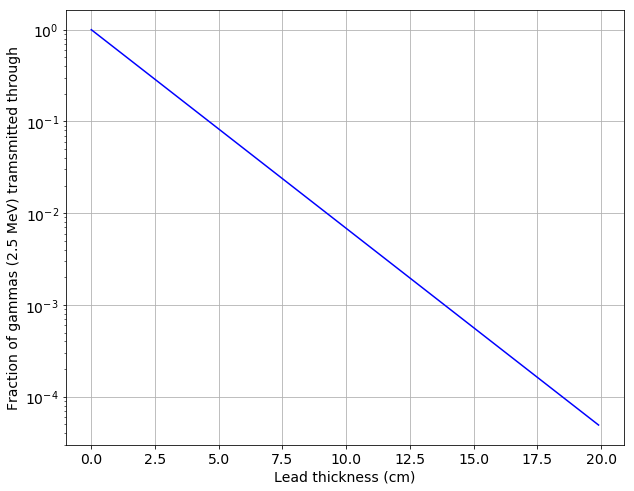

In [228]:
plt.semilogy(pbth / cm, T,'b')
plt.grid(True)
plt.xlabel('Lead thickness (cm)')
plt.ylabel('Fraction of gammas (2.5 MeV) tramsmitted through')
plt.show()

#### Lead shield reduce energetic gammas almost three orders of magnitude

### Computing initial flux from lab crossing NEXT

1. Define a cylinder shell and two disks surrounding the detector
2. Compute the total activity entering the detector as the product of the surfaces of the envelop volumes and the LSC flux. 

In [134]:
from pynext.Shapes import CylinderShell
from pynext.Shapes import Disk

In [165]:
PV_ID = 1360 * mm  # PV inner diameter
PV_TH = 1.8 * cm # PV thickness
PV_Z  = 160 * cm
PB_TH = 20  * cm 
CU_TH = 12  * cm 

PV_IR  = PV_ID / 2
PV_OD  = PV_ID + PV_TH
PV_OR  = PV_OD / 2

CU_ID = PV_ID - CU_TH
CU_OD = PV_ID
CU_IR = CU_ID / 2
CU_OR = CU_OD / 2


In [170]:
pv_body_envelop = CylinderShell(Rin=PV_OR, Rout=PV_OR + 1 * mm, L=PV_Z)

In [171]:
pv_head_envelop = Disk         (R=PV_OR, t=PV_OR + 1 * mm)

In [172]:
pv_body_envelop.inner_surface() / cm2

69265.83482634775

In [173]:
pv_head_envelop.inner_surface() / cm2

14913.800061048001

In [174]:
surface_envelop = pv_body_envelop.inner_surface() + 2 * pv_head_envelop.inner_surface()
lsc_next_activity_body_bi214 = G_Bi * pv_body_envelop.inner_surface()
lsc_next_activity_head_bi214 = 2 * G_Bi * pv_head_envelop.inner_surface()
lsc_next_activity_body_tl208 = G_Tl * pv_body_envelop.inner_surface()
lsc_next_activity_head_tl208 = 2 * G_Tl * pv_head_envelop.inner_surface()

In [175]:
print("""
activity in NEXT from LSC gamma 2448 keV (Bi-214) = {} Bq
activity in NEXT from LSC gamma 2614 keV (Tl-208) = {} Bq
""".format((lsc_next_activity_body_bi214  + lsc_next_activity_head_bi214)/ Bq, 
           (lsc_next_activity_body_tl208  + lsc_next_activity_head_tl208)/ Bq))


activity in NEXT from LSC gamma 2448 keV (Bi-214) = 644.1073271648845 Bq
activity in NEXT from LSC gamma 2614 keV (Tl-208) = 1932.3219814946533 Bq



### Computing the shielding of the Lead Castle

1. Define a cylinder shell and two disks filled of lead with thickness of 12 cm
2. Compute the transmittance through them

In [176]:
lead_body = CylinderShell(Rin=PV_OR, Rout=PV_OR + PB_TH, L=PV_Z)
lead_head = Disk         (R=PV_OR, t=PV_OR + PB_TH)

In [177]:
lead_wall_body = PhysicalVolume('WallBody', pb, lead_body)
lead_wall_head = PhysicalVolume('WallHead', pb, lead_head)

In [184]:
lsc_activity_through_castle_body_bi214 =(lsc_next_activity_bi214   * 
                                         lead_wall_body.material.transmittance_at_qbb(PB_TH))
lsc_activity_through_castle_head_bi214 =(lsc_next_activity_head_bi214 * 
                                         lead_wall_head.material.transmittance_at_qbb(PB_TH))

lsc_activity_through_castle_bi214 =(lsc_activity_through_castle_body_bi214 +
                                   lsc_activity_through_castle_head_bi214)

In [185]:
lsc_activity_through_castle_body_tl208 =(lsc_next_activity_tl208   * 
                                         lead_wall_body.material.transmittance_at_qbb(PB_TH))
lsc_activity_through_castle_head_tl208 =(lsc_next_activity_head_tl208 * 
                                         lead_wall_head.material.transmittance_at_qbb(PB_TH))

lsc_activity_through_castle_tl208 =(lsc_activity_through_castle_body_tl208 +
                                   lsc_activity_through_castle_head_tl208)

In [186]:
lsc_activity_through_castle_bi214 / mBq

2114.381347459451

In [187]:
lsc_activity_through_castle_tl208 / mBq

6343.144042378352

### Computing the shielding of the Copper Shield

1. Repeat the procedure for copper

In [182]:
cu_body = CylinderShell(Rin=CU_IR, Rout=CU_OR, L=PV_Z)
cu_head = Disk         (R=CU_OR, t=CU_TH)

In [183]:
cu_shield_body = PhysicalVolume('ShieldBody', cu, cu_body)
cu_shield_head = PhysicalVolume('ShieldHead', cu, cu_head)

In [190]:
lsc_activity_through_shield_body_bi214 =(lsc_activity_through_castle_body_bi214 * 
                                         cu_shield_body.material.transmittance_at_qbb(CU_TH))
lsc_activity_through_shield_head_bi214 =(lsc_activity_through_castle_head_bi214 * 
                                         cu_shield_head.material.transmittance_at_qbb(CU_TH))
lsc_activity_through_shield_bi214 =(lsc_activity_through_shield_body_bi214 +
                                   lsc_activity_through_shield_head_bi214)

In [191]:
lsc_activity_through_shield_body_tl208 =(lsc_activity_through_castle_body_tl208 * 
                                         cu_shield_body.material.transmittance_at_qbb(CU_TH))
lsc_activity_through_shield_head_tl208 =(lsc_activity_through_castle_head_tl208 * 
                                         cu_shield_head.material.transmittance_at_qbb(CU_TH))
lsc_activity_through_shield_tl208 =(lsc_activity_through_shield_body_tl208 +
                                   lsc_activity_through_shield_head_tl208)

In [192]:
lsc_activity_through_shield_bi214 / mBq

31.92015222680627

In [193]:
lsc_activity_through_shield_tl208 / mBq

95.7604566804188

### Pressure Vessel

In [209]:
pvs =CylinderShell(Rin=PV_IR, Rout=PV_OR, L=PV_Z)
pvh = Disk        (R=PV_OR, t=PV_TH)

In [210]:
pv_body = PhysicalVolume('PVBody', ti316, pvs)
pv_head = PhysicalVolume('PVHead', ti316, pvh)

In [216]:
pv_body.mass / kg

487.405634364807

In [218]:
pv_head.mass / kg

211.26889166480603

In [224]:
pv_body.S / m2

6.83610561421139

In [225]:
pv_head.S / m2

1.4913800061048001

In [219]:
pv_body_activity_bi214 = pv_body.activity_bi214_self_shield(PV_TH) 
pv_head_activity_bi214 = pv_head.activity_bi214_self_shield(PV_TH)

In [221]:
pv_body_activity_bi214 / mBq

248.01379438545175

In [222]:
pv_head_activity_bi214 / mBq

54.10724103145957

In [223]:
pv_body_activity_tl208 / mBq

248.01379438545175

In [212]:
pv_body_activity_tl208 = pv_body.activity_tl208_self_shield(PV_TH)
pv_head_activity_tl208 = pv_head.activity_tl208_self_shield(PV_TH)

In [214]:
print("""
activity PV body gamma 2448 keV (Bi-214) = {} Bq
activity PV body from LSC gamma 2614 keV (Tl-208) = {} Bq
""".format((pv_body_activity_bi214 + pv_head_activity_bi214 )/ mBq, 
           (pv_body_activity_tl208 + pv_head_activity_tl208)/ mBq))


activity PV body gamma 2448 keV (Bi-214) = 248.01379438545175 Bq
activity PV body from LSC gamma 2614 keV (Tl-208) = 248.01379438545175 Bq



In [ ]:
+ pv_head_activity_bi214 + pv_head_activity_tl208

In [ ]:
pv.activity_through_shield_bi214 = pv.activity_bi214_self_shield(PV_TH) 

### Inner Copper Shield

In [33]:
ICS_OD = PV_ID 
ICS_TH = 15 * cm # PV thickness
ICS_ID = ICS_OD - ICS_TH
ICS_Z = PV_Z

In [34]:
icss =CylinderShell(Rin=ICS_ID / 2, Rout=ICS_OD / 2, L=ICS_Z)
ics = PhysicalVolume('ICS', cu, icss)

In [35]:
ics.activity_bi214_self_shield(12 * cm) / mBq

1.5359752481551037

In [36]:
ics.activity_tl208_self_shield(12 * cm) / mBq

1.5359752481551037

In [37]:
ics.S / m2

6.0821233773498395

In [38]:
pv.S / m2

6.83610561421139

In [39]:
ics.material.transmittance_at_qbb(ICS_TH)

0.005291783205644898

### Shielding of ICS

In [40]:
pv.activity_bi214_self_shield(PV_TH)* ics.material.transmittance_at_qbb(ICS_TH)  / mBq

1.3124352318972006

In [41]:
tlsc_bi * ics.material.transmittance_at_qbb(ICS_TH) / mBq 

6.5612014829168075

### Class PressureVessel

In [125]:
from pynext.PressureVessel import PressureVessel
from pynext.PressureVessel import n100d, n100pv, n100cs

In [126]:
pv = PressureVessel(n100pv, n100cs)

In [127]:
pv


        Pressure Vessel:
        ----------------

        material = 316ti
        specific activity: Bi-214 =    1.00 mBq/kg Tl-208 =    1.00 mBq/kg
        body:
        R =   68.00 cm;  thickness =    1.80 cm; mass =  487.41 kg
        activity Bi-214 =  487.41 mBq, self-shielded = 248.01 mBq
        activity Tl-208 =  487.41 mBq, self-shielded = 248.01 mBq

        heads:
        thickness =    1.80 cm; mass =  411.57 kg
        activity Bi-214 =  205.79 mBq, self-shielded =  52.70 mBq
        activity Tl-208 =  205.79 mBq, self-shielded =  52.70 mBq

        flanges:
        thickness =    1.80 cm; mass =   22.08 kg
        activity Bi-214 =   11.04 mBq, self-shielded =   2.79 mBq
        activity Tl-208 =   11.04 mBq, self-shielded =   2.79 mBq

        Copper Shield
        material = Cu
        specific activity: Bi-214 =   12.00 muBq/kg Tl-208 =   12.00 muBq/kg
        body:
        thickness =   12.00 cm; mass = 3512.95 kg
        activity Bi-214 =   42.16 mBq, self-shielde

In [155]:
pv2.pvBody.V / m3

0.12467850268742596

In [160]:
pv2.pvBody.shape.inner_volume() / m3

2.3242759088318725

In [162]:
pv2.pvBody.shape.shell_volume() / m3

0.12467850268742596

In [163]:
Rin  =  n100d.d / 2
Rout = (n100d.d + n100d.t) / 2
L    = n100d.l

In [171]:
2 * pi * (Rout**2  - Rin**2) * L / m3

0.12386420187161548

In [167]:
Rout / m

0.689

In [168]:
Rin / m

0.68

In [170]:
L / m

1.6